# Project 2: Data Import and cleaning

**Contents**
1. Importing libraries
2. Importing dataset
3. Model Prep
4. Cross Validation

### 1. Importing Libraries

In [1]:
#Data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

#Modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

#Data splitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict,KFold, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 2. Importing Dataset

In [2]:
#Import Ames housing dataset from pt1

train = pd.read_csv('/Users/vjfychan/Downloads/ames_rem.csv')

In [3]:
#Display all columns
pd.set_option('display.max_columns',None)

#Display all rows
pd.set_option('display.max_rows',None)

#View first 5 rows 
train.head()


,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,GrLivArea,BedroomAbvGr,Functional,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SalePrice,LotFrontage,TotalBaths,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,13517,3,6,8,1976,289.0,3,3.0,1.0,533.0,0.0,192.0,725.0,5,5,1479,3,8,0.0,2.0,2.0,3.0,3.0,3,0,44,0,0,0.0,3,2010,130500,65.040848,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,11492,3,7,5,1996,132.0,3,3.0,1.0,637.0,0.0,276.0,913.0,5,5,2122,4,8,3.0,2.0,2.0,3.0,3.0,3,0,74,0,0,0.0,4,2009,220000,43.000000,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7922,4,5,7,1953,0.0,4,3.0,1.0,731.0,0.0,326.0,1057.0,3,5,1057,3,8,0.0,1.0,1.0,3.0,3.0,3,0,52,0,0,0.0,1,2010,109000,68.000000,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [4]:
train.shape #(1767, 181)

(1767, 181)

### 3. Model Prep

In [20]:
#Creating X and y variable
X = train.drop('SalePrice',axis=1).values
y = train['SalePrice']
features = train.drop('SalePrice',axis=1)._get_numeric_data().columns

In [6]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(1325, 180)
(1325,)
(442, 180)
(442,)


### 4. Cross Validation

In [13]:
#Create a models dictionary
#Model selection
models = {'Linear Regression':LinearRegression(),
         'Ridge': Ridge(),
         'Lasso':Lasso()}


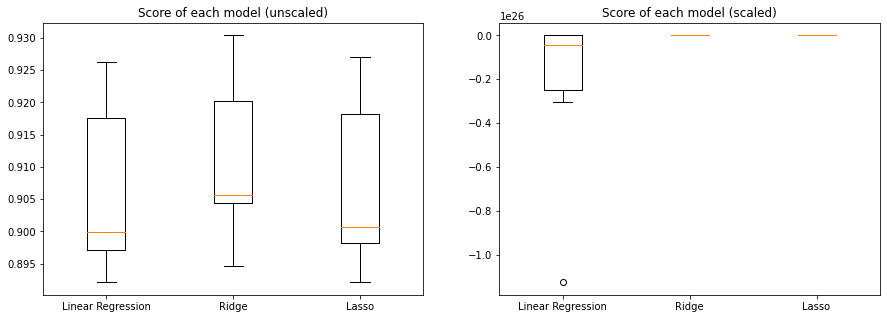

Unscaled Linear Regression mean cv score:0.9063121075848755
Unscaled Ridge mean cv score:0.9109073966029456
Unscaled Lasso mean cv score:0.9070107124825294
Scaled Linear Regression mean cv score:-2.5289130105646845e+25
Scaled Ridge mean cv score:0.9066095735273211
Scaled Lasso mean cv score:0.9063662069106885


In [14]:
#Train data

results=[]

for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model,X_train,y_train,cv=kf)
    results.append(cv_results)

results_scaled=[]

for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results_scaled = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results_scaled.append(cv_results_scaled)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].boxplot(results, labels=models.keys())
axs[1].boxplot(results_scaled, labels=models.keys())
axs[0].title.set_text('Score of each model (unscaled)')
axs[1].title.set_text('Score of each model (scaled)')
plt.show()

for i, j in zip(range(len(results)), range(len(list(models.keys())))):
    mean_cv_score = results[i].mean()
    print('Unscaled {} mean cv score:{}'.format(list(models.keys())[j], mean_cv_score))

for i, j in zip(range(len(results_scaled)), range(len(list(models.keys())))):
    mean_cv_score = results_scaled[i].mean()
    print('Scaled {} mean cv score:{}'.format(list(models.keys())[j], mean_cv_score))
    

#### Notes
Both scaled and unscaled train data show that Ridge regression is the best model

In [21]:
#Test data

#Before scaling
for name,model in models.items():
    model.fit(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print('{} Test Set(unscaled) Accuracy:{}'.format(name, test_score));

#After scaling
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    print('{} Test Set(scaled) Accuracy:{}'.format(name, test_score))


#mode.score returns the R² which is a statistical measure in a regression model that determines the
#proportion of variance in the dependent variable that can be explained by the independent variable


Linear Regression Test Set(unscaled) Accuracy:0.9066299916152809
Ridge Test Set(unscaled) Accuracy:0.9085357340902125
Lasso Test Set(unscaled) Accuracy:0.9064859394991013
Linear Regression Test Set(scaled) Accuracy:-9.544677493912944e+20
Ridge Test Set(scaled) Accuracy:0.9062261533508345
Lasso Test Set(scaled) Accuracy:0.9062210095774225


#### Notes

It looks like Ridge is the best performing model on both train and test sets.\
Let's perform hyperparamter tuning.

In [22]:
#Let's use RandomizedSearchCV to find the best alpha parameter
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.linspace(0.001,100,100)}

#Instantiate Ridge model
ridge = Ridge()

#Use RandomizedSearchCV to find the best alpha
ridge_cv = RandomizedSearchCV(ridge,param_grid, cv=kf, n_iter=1)
ridge_cv.fit(X_train_scaled,y_train)

pred_y = ridge_cv.predict(X_test_scaled)
test_score = r2_score(y_test,pred_y)
rmse = mean_squared_error(y_test,pred_y,squared=False)

print(ridge_cv.best_params_,ridge_cv.best_score_);
print('RMSE:',rmse)

#{'alpha': 38.384454545454545} 0.9095019738519492
#RMSE: 21989.0266921929

{'alpha': 39.39454545454546} 0.9095112931467382
RMSE: 21988.55858081275


In [23]:
#Examine ridge coefficients using scaled data
ridge_coef = ridge_cv.best_estimator_.coef_
ridge_coefficients = pd.DataFrame()
ridge_coefficients['features'] = features
ridge_coefficients['coefficient_values'] = ridge_coef
ridge_coefficients = ridge_coefficients.sort_values(by='coefficient_values', ascending = False)

ridge_coefficients

,features,coefficient_values
15,GrLivArea,21732.512743
2,OverallQual,14017.012505
4,YearBuilt,9446.802727
9,BsmtFinSF1,8069.692286
12,TotalBsmtSF,7438.694243
87,Neighborhood_NridgHt,6432.367519
20,GarageCars,5178.118591
3,OverallCond,4974.561433
0,LotArea,4846.558033
5,MasVnrArea,4237.591478


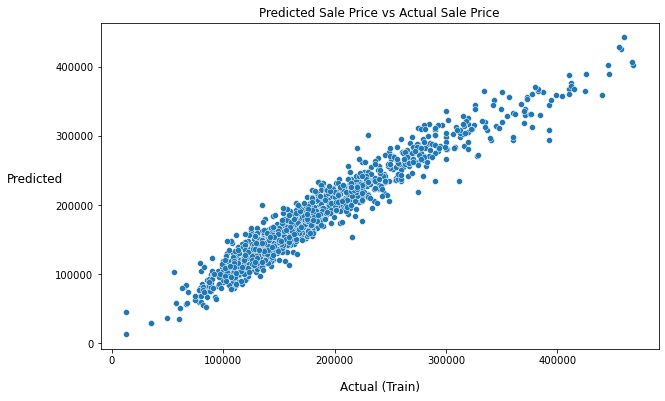

In [26]:
#Scatter plot of train data predicted Sale price vs. Actual Sale price
plt.figure(figsize=(10,6))
sns.scatterplot(y_train,ridge_cv.predict(X_train_scaled))

plt.title("Predicted Sale Price vs Actual Sale Price", fontsize=12)
plt.xlabel("Actual (Train)", labelpad=15, fontsize=12)
plt.ylabel("Predicted", labelpad=20, rotation =0, fontsize=12);

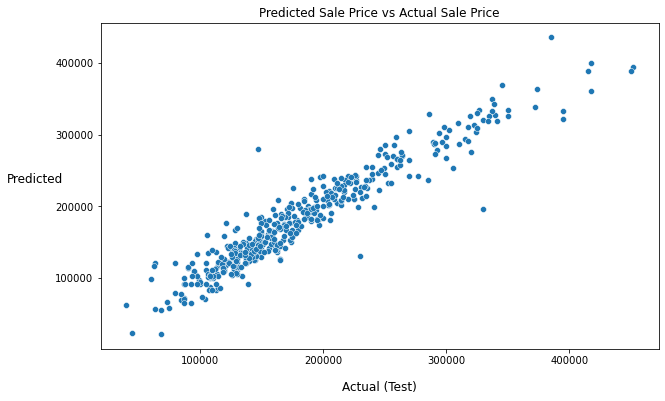

In [28]:
#Scatter plot of test data predicted Sale price vs Actual Sale Price
plt.figure(figsize=(10,6))
sns.scatterplot(y_test,pred_y)
plt.title("Predicted Sale Price vs Actual Sale Price", fontsize=12)
plt.xlabel("Actual (Test)", labelpad=15, fontsize=12)
plt.ylabel("Predicted", labelpad=20, rotation =0, fontsize=12);

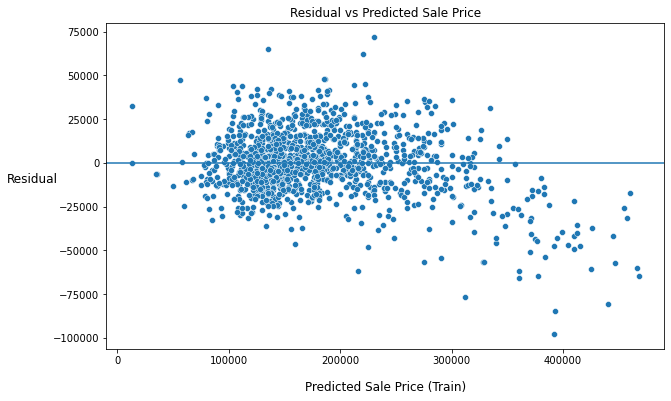

In [29]:
#Residuals vs. Predicted sale price for train data
residuals = ridge_cv.predict(X_train_scaled) - y_train
plt.figure(figsize=(10,6))
graph = sns.scatterplot(y_train,residuals)
graph.axhline(0)
plt.title("Residual vs Predicted Sale Price", fontsize=12)
plt.xlabel("Predicted Sale Price (Train)", labelpad=15, fontsize=12)
plt.ylabel("Residual", labelpad=20, rotation =0, fontsize=12);

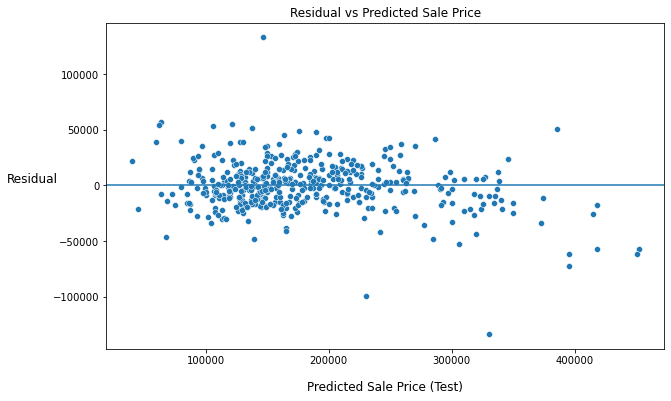

In [30]:
#Residuals vs. Predicted sale price for test data

residuals1 = pred_y - y_test
plt.figure(figsize=(10,6))
graph = sns.scatterplot(y_test,residuals1)
graph.axhline(0)
plt.title("Residual vs Predicted Sale Price", fontsize=12)
plt.xlabel("Predicted Sale Price (Test)", labelpad=15, fontsize=12)
plt.ylabel("Residual", labelpad=20, rotation =0, fontsize=12);

In [31]:
top10 = ridge_coefficients.head(10)
top10 = top10.reset_index()
top10['index'] = [i for i in range(10)]
top10

,index,features,coefficient_values
0,0,GrLivArea,21732.512743
1,1,OverallQual,14017.012505
2,2,YearBuilt,9446.802727
3,3,BsmtFinSF1,8069.692286
4,4,TotalBsmtSF,7438.694243
5,5,Neighborhood_NridgHt,6432.367519
6,6,GarageCars,5178.118591
7,7,OverallCond,4974.561433
8,8,LotArea,4846.558033
9,9,MasVnrArea,4237.591478


In [32]:
bottom10 = ridge_coefficients.tail(10)
bottom10 = bottom10.reset_index()
bottom10['index'] = [i for i in range(10)]
bottom10

,index,features,coefficient_values
0,0,Exterior2nd_Wd Shng,-1659.258737
1,1,MSSubClass_190,-1709.008190
2,2,Condition1_Artery,-1734.983089
3,3,LandContour_Low,-1772.480640
4,4,Exterior2nd_Plywood,-1895.021615
5,5,MSZoning_RM,-1936.212779
6,6,Neighborhood_Edwards,-2094.068888
7,7,BedroomAbvGr,-2551.328765
8,8,Neighborhood_NAmes,-3194.407839
9,9,Neighborhood_NWAmes,-3275.018855


In [33]:
top_bot_10 = pd.concat((top10,bottom10))
top_bot_10

,index,features,coefficient_values
0,0,GrLivArea,21732.512743
1,1,OverallQual,14017.012505
2,2,YearBuilt,9446.802727
3,3,BsmtFinSF1,8069.692286
4,4,TotalBsmtSF,7438.694243
5,5,Neighborhood_NridgHt,6432.367519
6,6,GarageCars,5178.118591
7,7,OverallCond,4974.561433
8,8,LotArea,4846.558033
9,9,MasVnrArea,4237.591478


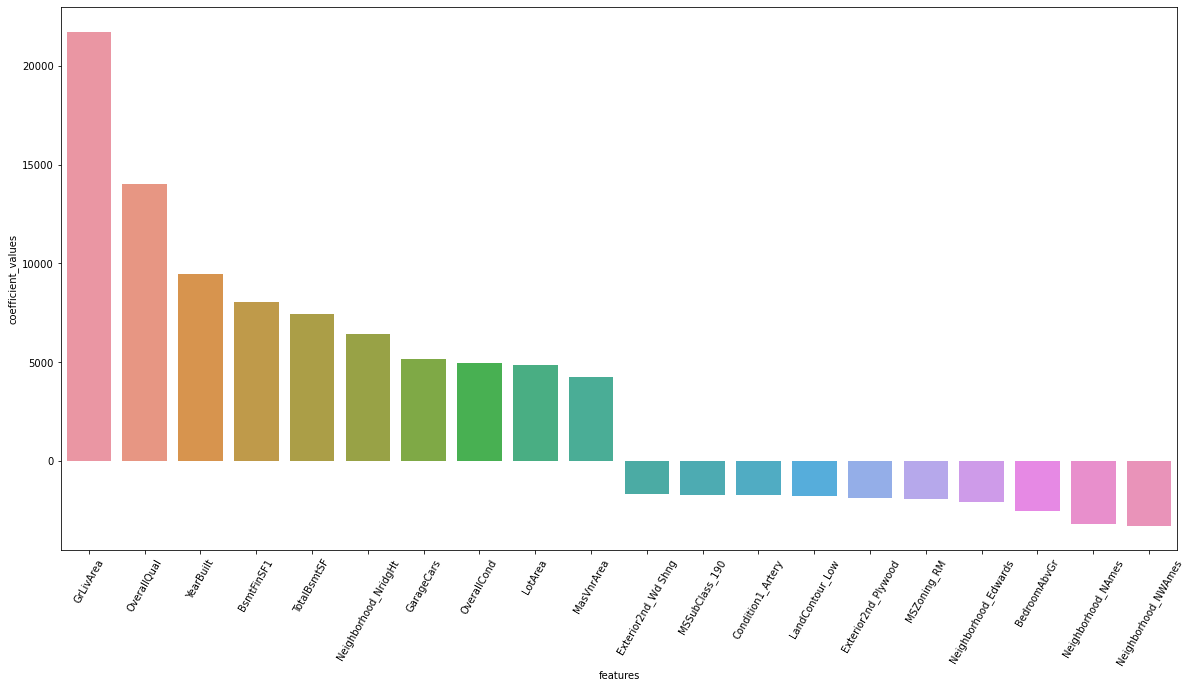

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='features',y='coefficient_values',data=top_bot_10)
plt.xticks(rotation=60)
plt.show()